In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math

### Monte Carlo Integration

#### 1) Let integrate
$$ \iiint \limits_{C} x^2(y-1)^2(z-2)^2\exp(xyz) \; dx \; dy \; dz$$
Over a cube $x \in [-1,1], y\in [-1,1], z\in [-1,1]$

#### 2) Evaluate
$$ \iiint \limits_{C} x^2(y-1)^2(z-2)^2\exp(xyz) \; dx \; dy \; dz$$
Over a sphere of radius 1 centered at the origin.

3) Do we guarantee to get the same answer when we repeat the experiment?

4) What do we need to do to guarantee the same answer?

5) How do we defind the convergence and how fast is the convergence for monte carlo integration?

## Hill Climbing

### Biggest Triangle.
Let us consider the problem of finding the triangle with maximum area from given 500 points.

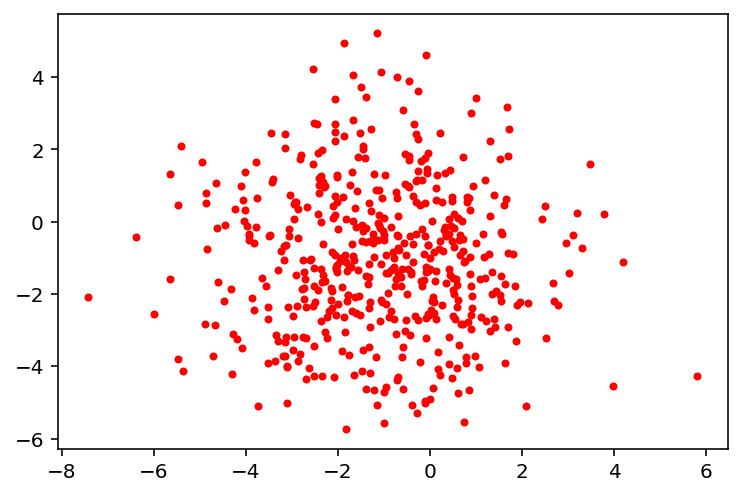

In [2]:
np.random.seed(13)
n = 500
x = np.random.randn(n)*2-1
y = np.random.randn(n)*2-1
plt.plot(x,y,'.r')

In [3]:
def triarea(x1,y1, x2,y2, x3,y3):
    #shoelace formula
    return 0.5*abs(x1*y2 + x2*y3 + x3*y1 - y1*x2 - y2*x3 - y3*x1)

def triarea2(r):
    x1,y1 = r[0]
    x2,y2 = r[1]
    x3,y3 = r[2]
    return triarea(x1,y1, x2,y2, x3,y3)


In [6]:
np.random.randint(0, 10) #

8

In [26]:

def random_answer():
    i,j,k = [np.random.randint(n) for i in range(3)]
    return [(x[i], y[i]),
            (x[j], y[j]),
            (x[k], y[k])] # [(x1, y1), (x2, y2), (x3, y3)]
ans = random_answer()
triarea2(ans)

def mutate(ans):
    ret = [a for a in ans]
    
    index_to_change = np.random.randint(3)
    change_to = np.random.randint(n)
    ret[index_to_change] = (x[change_to], y[change_to])
    return ret

def find_points():
    ans = random_answer()
    for i in range(1000):
        new_ans = mutate(ans)
        if triarea2(new_ans) > triarea2(ans):
            ans = new_ans
            print(triarea2(ans))
    return ans, triarea2(ans)

ans, area = find_points()

8.896047611284228
25.094807916199677
26.420928638714614
26.804012590983607
27.457091947598677
41.26828116103957
42.69060583101864
44.64090107272877
52.19459191061368


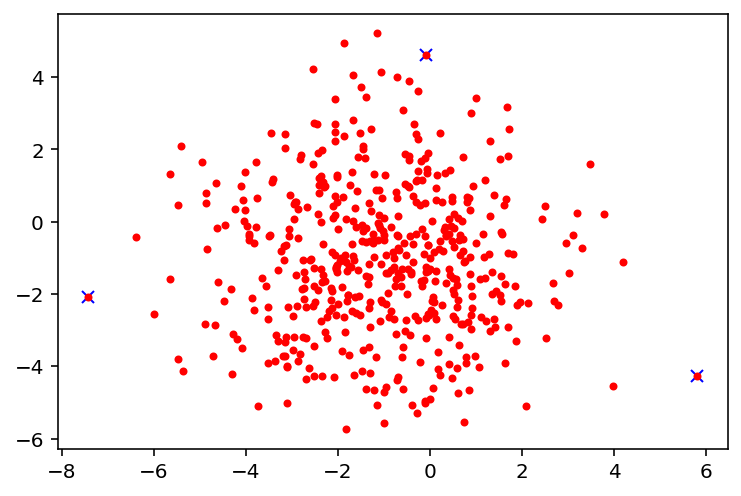

In [27]:
for xx, yy in ans:
    plt.plot(xx ,yy, 'xb')
plt.plot(x,y,'.r')

### Scheduling Exam

Give classes and the intersection of students. Find a decent scheduling under 15 slot for 70 classes. Number of student taking both class `i` and class `j` can be found using `student[i][j]`.

[[ 0  0 10 ... 35  0 50]
 [ 0  0  0 ...  0 23 52]
 [10  0  0 ... 15  1 67]
 ...
 [35  0 15 ...  0  0  0]
 [ 0 23  1 ...  0  0 12]
 [50 52 67 ...  0 12  0]]


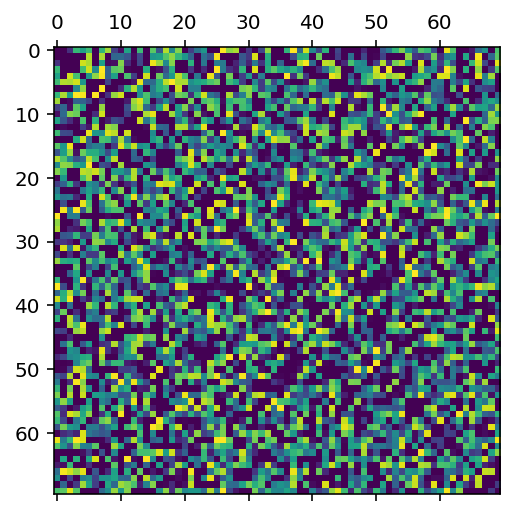

In [36]:

np.random.seed(222)
nclass = 70
student = np.random.randint(0,100,(nclass, nclass))

for i in range(nclass-1):
    for j in range(i+1,nclass):
        student[i,j] = student[j,i]

for i in range(nclass):
    student[i,i] = 0 
    
student[student>70] = 0
    
print (student)

plt.matshow(student)

In [33]:
# ans = [class 1 slot, class 2 slot, c ....] --> 70 numbers (0-14)

[np.random.randint(15) for i in range(70)]

# mutate: pick a class -> assign it a new slot

# less complain ->> keep 
# more complain ->> throw away

[1,
 6,
 0,
 9,
 8,
 1,
 3,
 11,
 5,
 13,
 12,
 5,
 13,
 12,
 6,
 11,
 10,
 10,
 11,
 12,
 6,
 2,
 9,
 5,
 8,
 13,
 12,
 7,
 10,
 10,
 12,
 4,
 11,
 8,
 14,
 14,
 10,
 11,
 12,
 11,
 0,
 12,
 9,
 3,
 8,
 8,
 14,
 9,
 4,
 3,
 10,
 2,
 14,
 4,
 4,
 3,
 8,
 0,
 6,
 2,
 3,
 12,
 11,
 10,
 5,
 5,
 10,
 1,
 2,
 14]

In [43]:
from typing import List, Tuple
n_class = 70
n_slot = 15
def initial_answer() -> List[int]:
    return [np.random.randint(n_slot) for _ in range(n_class)]
    
def mutate(ans: List[int]) -> List[int]:
    new_answer = ans.copy()
    class_to_change = np.random.randint(n_class)
    change_to = np.random.randint(n_slot)
    new_answer[class_to_change] = change_to
    return new_answer
  
def evaluate(ans: List[int]) -> int:
    complaints = 0
    for first_class in range(n_class):
        for second_class in range(first_class+1, n_class):
            first_slot = ans[first_class]
            second_slot = ans[second_class]
            if first_slot == second_slot:
                complaints += student[first_class, second_class]
    return complaints

def find_schedule()-> Tuple[List[int], int]:
    # answer, # of complaints
    ans = initial_answer()
    best_complaints = evaluate(ans)
    for i in range(10000):
        new_answer = mutate(ans)
        new_complaints = evaluate(new_answer)
        if new_complaints < best_complaints:
            ans = new_answer
            best_complaints = new_complaints
        if i% 100==0:
            print(best_complaints)
    return ans, best_complaints

find_schedule()
        

3375
2029
1496
1349
1157
1088
961
929
780
712
712
703
649
633
582
563
549
521
485
421
391
391
367
367
358
358
328
328
328
328
328
328
325
325
314
309
309
309
309
309
309
308
308
308
308
295
295
295
295
295
295
295
295
295
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292
292


([5,
  7,
  1,
  2,
  6,
  14,
  8,
  13,
  1,
  8,
  12,
  11,
  5,
  10,
  10,
  3,
  11,
  13,
  11,
  4,
  1,
  10,
  3,
  9,
  2,
  5,
  9,
  2,
  8,
  0,
  10,
  4,
  1,
  4,
  12,
  6,
  7,
  6,
  9,
  0,
  3,
  6,
  7,
  14,
  14,
  14,
  2,
  6,
  8,
  7,
  9,
  7,
  3,
  4,
  11,
  3,
  11,
  8,
  3,
  12,
  12,
  13,
  13,
  1,
  5,
  9,
  14,
  0,
  13,
  0],
 292)

In [44]:
15**70

21202551848302519423058473919795427435467695398418896957082324661314487457275390625

## Substitution Cipher is a bad idea

### Substitution Encryption

One of the weakest encryption is called substibution encryption. Here is how it works let's supposed that my message that I want to send to you is
```
this problem is easy
```

The substition encryption works by replacing each letter using a fixed dictionary. For example, suppose my encryption key dictionary is
```python
{'a':'b', 'b':'c', 'c':'d', ...}
```
This tells that every character `a` in the message should be replaced by letter `b` in the encrypted messsage and so on.

Using the dictionary above, then the encrypted message would be
```
uijt qspcmfn jt fbtz 
```

If we know the dictionary key(which is typically agreed before sending the message), it's very easy to invert. Since `a` maps to `b` in encryption that means to decrypt it we just need to replace every `b` to `a`.

ROT13 you did in programming I is an example of substitution encryption.

In this problem we will use hill climbing to crack this encryption. That is we want to decrypt the message **without** knowing what the encryption key is. We are going to use math and some probabilities. For simplicity of this problem we will only deal with lower case letters and no punctuation except for space.

### Problem

In this problem your job is to **decrypt the msssage**.
 - The encrypted message is
```
 vxm enkv embgryjz vxrou ro vxm qnbzp r vxroi rk vxm roftrzrvl ny vxm xjefo erop vn gnbbmzfvm fzz rvk gnovmovk qm zrwm no f azfgrp rkzfop ny ruonbfogm ro vxm erpkv ny tzfgi kmfk ny royrorvl fop rv qfk onv emfov vxfv qm kxnjzp wnlfum yfb vxm kgrmogmk mfgx kvbfrorou ro rvk nqo prbmgvrno xfwm xrvxmbvn xfbemp jk zrvvzm tjv knem pfl vxm armgrou vnumvxmb ny prkkngrfvmp ionqzmpum qrzz namo ja kjgx vmbbrylrou wrkvfk ny bmfzrvl fop ny njb ybruxvyjz ankrvrno vxmbmro vxfv qm kxfzz mrvxmb un efp ybne vxm bmwmzfvrno nb yzmm ybne vxm zruxv rovn vxm amfgm fop kfymvl ny f omq pfbi fum
```

Of course you are not given the encryption key. The goal is to find the best encryption key and decrypt the message.

### What is the best key?

Since you are not given the encryption key, it seems like it is impossible to decrypt the message. However, due to probabilistic nature of natural language, it is quite easy to figure out whether a random sequence of letters the real english message or not. A good key would give a decrypt message that looks like a real english message.

For example, given the same encrypted message and you guess for two keys. The first key gives you the decrypted message of
```
i am the best
```
while the second key give you the decrypted message of
```
j bn uif cftu
```
It is quite clear the that top one is more like an English language therefore the first key is probably a better key.

To tell a computer what sequence of letter looks more like English. We can take a look at thick book and look for how frequent 2 consecutive letters(bigram) appear in the book.

For example, let's take the probability of 2 consecutive letters(bigram) to appear in an english message. The bigram `th` appears way more than `di`. So, if the encryption key that gives a lot of `th` bigram is more likely to be correct than the one that gives a lot of `di`.

Plus the fact that one character word is most likely going to be either `a` or `i`. If the key we guess put `a` or `i` in there, we are probably getting the right key.

Our method relies on the fact that some n consecutive letters(n-gram) appear more than other. Fortunately, someone wrote a program to read a huge amount of English books and count how many times n-gram appear. The file for 2-gram frequency is given in `count_2l.txt` and the file for 3-gram frequency is given in `count_3l.txt`. Source: http://norvig.com/ngrams/

To help you, I already give you a function for reading those files and convert the frequencies to score(which is a log probability). (If you want to know why, take pattern recognition.). The result is kept in dictionaries(more on next section).

### How the score works

As described in the previous section, the score should be a measure of how likely a sequence of decrpyted message to be an english message. To give an accurate score, we want to split the score in to three cases depending on the length of the word.

To give a score on a decrypted message. The score will be the sum of the score on each decrypted word.
- For word with 1 letter the score is given by looking up the dictionary `unigram_score`
- For word with 2 letters the score is given by looking up the dictionary `bigram_score`
- For word with 3 or more letters the score is given by computing the score of **every trigram**. The score of each trigram is given by the dictionary `trigram_score`. For example, the decrypted word `defts` will score
```python
trigram_score['def'] + trigram_score['eft'] + trigram_score['fts']
```
- The total score is given by the sum of score for each word in the decrypted message.

#### Note:
For dictionary lookup fail just give it score of -100). `dict.get` is your friend.

### Hint

 - Do not write this whole thing in one big function. You will just confuse yourself.
 - It should converge within a couple thousand iterations. If it doesn't, try agian, it might get stuck at local minima.

In [45]:
cipher_text = 'vxm enkv embgryjz vxrou ro vxm qnbzp r vxroi rk vxm roftrzrvl ny vxm xjefo erop vn gnbbmzfvm fzz rvk gnovmovk qm zrwm no f azfgrp rkzfop ny ruonbfogm ro vxm erpkv ny tzfgi kmfk ny royrorvl fop rv qfk onv emfov vxfv qm kxnjzp wnlfum yfb vxm kgrmogmk mfgx kvbfrorou ro rvk nqo prbmgvrno xfwm xrvxmbvn xfbemp jk zrvvzm tjv knem pfl vxm armgrou vnumvxmb ny prkkngrfvmp ionqzmpum qrzz namo ja kjgx vmbbrylrou wrkvfk ny bmfzrvl fop ny njb ybruxvyjz ankrvrno vxmbmro vxfv qm kxfzz mrvxmb un efp ybne vxm bmwmzfvrno nb yzmm ybne vxm zruxv rovn vxm amfgm fop kfymvl ny f omq pfbi fum'

In [46]:
print(cipher_text)

vxm enkv embgryjz vxrou ro vxm qnbzp r vxroi rk vxm roftrzrvl ny vxm xjefo erop vn gnbbmzfvm fzz rvk gnovmovk qm zrwm no f azfgrp rkzfop ny ruonbfogm ro vxm erpkv ny tzfgi kmfk ny royrorvl fop rv qfk onv emfov vxfv qm kxnjzp wnlfum yfb vxm kgrmogmk mfgx kvbfrorou ro rvk nqo prbmgvrno xfwm xrvxmbvn xfbemp jk zrvvzm tjv knem pfl vxm armgrou vnumvxmb ny prkkngrfvmp ionqzmpum qrzz namo ja kjgx vmbbrylrou wrkvfk ny bmfzrvl fop ny njb ybruxvyjz ankrvrno vxmbmro vxfv qm kxfzz mrvxmb un efp ybne vxm bmwmzfvrno nb yzmm ybne vxm zruxv rovn vxm amfgm fop kfymvl ny f omq pfbi fum


In [55]:
import string
import math

def load_l2score_dict():
    with open('count_2l.txt') as f:
        total = 0
        d = {}
        for l in f:
            t, n = l.split()
            d[t] = int(n)
            total += int(n)
        for k,v in d.items():
            d[k] = math.log(d[k]/float(total))
        return d
    
def load_l3score_dict():
    with open('count_3l.txt') as f:
        total = 0
        d = {}
        for l in f:
            t, n = l.split()
            d[t] = int(n)
            total += int(n)
        for k,v in d.items():
            d[k] = math.log(d[k]/float(total))
    return d
unigram_score = {x: (math.log(0.5) if x=='a' or x=='i' else -100.) for x in string.ascii_lowercase }
bigram_score = load_l2score_dict()
trigram_score = load_l3score_dict()

In [56]:
print(unigram_score['a'])
print(bigram_score['th']) # more frequent word more score(less negative)
print(bigram_score['di']) # less frequent word less score(more negative)
print(trigram_score['thi'])

-0.6931471805599453
-3.913570062071025
-5.299868266670957
-6.110152491400357


In [51]:

import string

In [59]:
from typing import Dict
def initial_answer() -> Dict[str, str]: # Dict[from, to]
    return {x:x for x in string.ascii_lowercase}
    
def mutate(ans: Dict[str, str]) -> Dict[str, str]:
    new_answer = answer.copy()
    n_letter = len(string.ascii_lowercase)
    first_letter = random.randint(n_letter)
    second_letter = random.randint(n_letter)
    new_answer[fist_letter] = ans[second_letter]
    new_answer[second_letter] = ans[first_letter]
    return new_answer

def decode(ans: Dict[str, str]) -> str:
    ret = []
    for s in cipher_text:
        if s!=' ':
            ret.append(ans[s])
        else:
            ret.append(' ')
    return ''.join(ret)
    
def evaluate(ans: Dict[str, str])-> float:
    ...


    
def find_key()->Dict[str, str]:
    ...
    


In [62]:
initial_answer().copy()

{'a': 'a',
 'b': 'b',
 'c': 'c',
 'd': 'd',
 'e': 'e',
 'f': 'f',
 'g': 'g',
 'h': 'h',
 'i': 'i',
 'j': 'j',
 'k': 'k',
 'l': 'l',
 'm': 'm',
 'n': 'n',
 'o': 'o',
 'p': 'p',
 'q': 'q',
 'r': 'r',
 's': 's',
 't': 't',
 'u': 'u',
 'v': 'v',
 'w': 'w',
 'x': 'x',
 'y': 'y',
 'z': 'z'}

In [61]:
string.ascii_lowercase[10]

'k'